# **Iris Dataset Classifier using Multiple Perceptron**

## Project Description

In this project, I have developed a classifier using the renowned Iris dataset. The project focuses on employing machine learning techniques to create a robust model capable of accurately classifying iris flowers into different species based on their sepal length, sepal width, petal length, and petal width.

The Iris dataset, a classic benchmark in the field of data science, contains samples from three iris species: Setosa, Versicolor, and Virginica. Leveraging popular machine learning libraries and algorithms, I implemented a classification model that learns patterns from the dataset and generalizes to make predictions on new, unseen data.

The project involves data preprocessing, exploratory data analysis, feature engineering, and the implementation of a machine learning algorithm. I chose MLPClasifier (Multi Perceptron Classifier) due to its suitability for the task at hand and its explorability for learnings in Data Science.

This classifier project not only demonstrates proficiency in handling real-world datasets but also showcases the practical application of machine learning concepts for classification tasks. The implementation is well-documented, and the results are thoroughly analyzed, providing insights into the model's performance and its implications.

By the end of this project, I aim to have a reliable classifier capable of accurately identifying the iris species, contributing to a deeper understanding of machine learning and its application in real-world scenarios.


In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [11]:
# Import dataset and ML libraries
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [12]:
# Preview dataset
iris_df = pd.read_csv('iris_csv.csv')

iris_df.rename(columns={'class': 'species'}, inplace=True)
iris_df.head(20)

,sepallength,sepalwidth,petallength,petalwidth,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [13]:
# Check if there are null values
iris_df.isnull().sum()

# Check species count
iris_df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

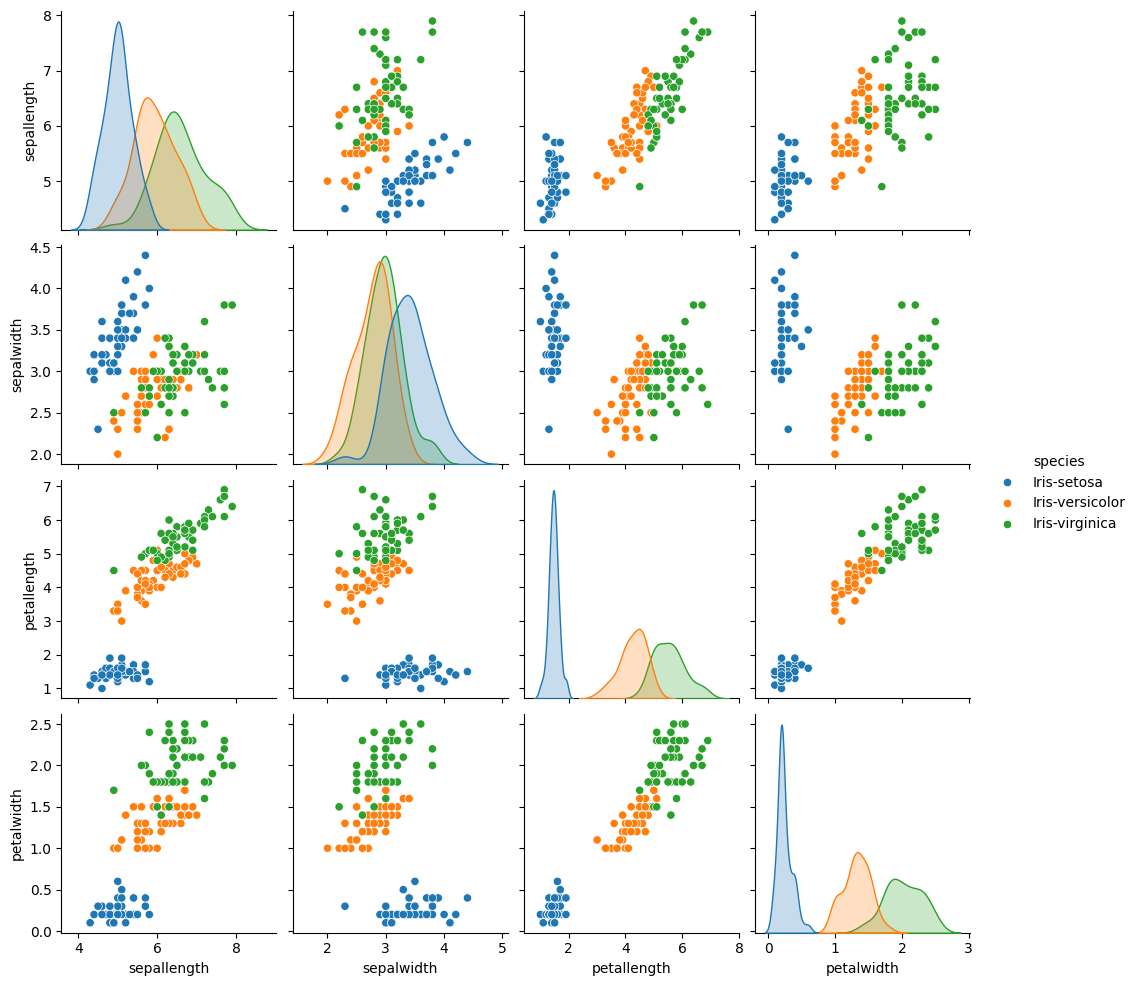

In [14]:
# pairplot to visualize the distribution of the input features
sns.pairplot(iris_df, hue='species')

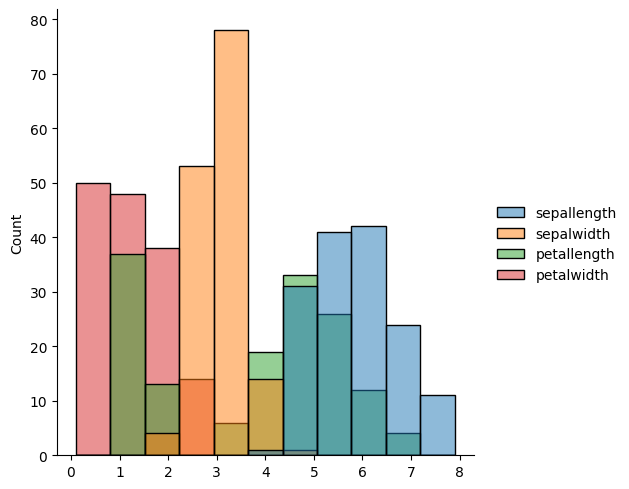

In [15]:
# Plot data distribution
sns.displot(iris_df)

## Train on defined split ratio

In [20]:
# Initialize MLP Model
MLP_model = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

# Split dataset into input features and target variable
X_train, X_test, y_train, y_test = train_test_split(iris_df.drop('species', axis=1), iris_df['species'], test_size=0.1, random_state=42)

print(f"Iris Dimension: {iris_df.shape}")
print(f"X_train Dimension: {X_train.shape}")
print(f"X_test Dimension: {X_test.shape}")

print(X_train.head())
print(y_train.head())



Iris Dimension: (150, 5)
X_train Dimension: (135, 4)
X_test Dimension: (15, 4)
     sepallength  sepalwidth  petallength  petalwidth
56           6.3         3.3          4.7         1.6
104          6.5         3.0          5.8         2.2
69           5.6         2.5          3.9         1.1
55           5.7         2.8          4.5         1.3
132          6.4         2.8          5.6         2.2
56     Iris-versicolor
104     Iris-virginica
69     Iris-versicolor
55     Iris-versicolor
132     Iris-virginica
Name: species, dtype: object


In [21]:
# Train model
MLP_model.fit(X_train, y_train)

#Print model training score
training_accuracy = MLP_model.score(X_train, y_train)
print(f"Training Accuracy: {training_accuracy}")

# Predict
y_pred = MLP_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
R2 = MLP_model.score(X_test, y_test)
print(f"R2: {R2}")

# Predict new data
new_data = [[5.1, 3.5, 1.4, 0.2]]
new_pred = MLP_model.predict(new_data)

print(f"New Prediction: {new_pred}")

Training Accuracy: 0.9851851851851852
Accuracy: 1.0
R2: 1.0
New Prediction: ['Iris-setosa']


## K-fold cross-validation (5-folds)

In [23]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(MLP_model, X_train, y_train, cv=5) # 5-fold cross validation

for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score}")
         
print(f"Mean Cross Validation Score: {scores.mean()}")

Fold 1: 1.0
Fold 2: 0.9629629629629629
Fold 3: 0.8518518518518519
Fold 4: 1.0
Fold 5: 1.0
Mean Cross Validation Score: 0.962962962962963
